In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-04-25 07:34:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  1.60MB/s    in 55s     

2021-04-25 07:35:12 (1.23 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [7]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [8]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='binary') # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

# theorethycally each epoch yields:
# steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
# validation_steps = TotalvalidationSamples / ValidationBatchSize

Epoch 1/25
25/25 - 1s - loss: 0.6997 - accuracy: 0.6400 - val_loss: 0.5415 - val_accuracy: 0.7000
Epoch 2/25
25/25 - 1s - loss: 0.6454 - accuracy: 0.6800 - val_loss: 0.5806 - val_accuracy: 0.7500
Epoch 3/25
25/25 - 1s - loss: 0.5116 - accuracy: 0.7400 - val_loss: 0.7614 - val_accuracy: 0.6500
Epoch 4/25
25/25 - 1s - loss: 0.6871 - accuracy: 0.6300 - val_loss: 0.6766 - val_accuracy: 0.6000
Epoch 5/25
25/25 - 1s - loss: 0.6333 - accuracy: 0.6900 - val_loss: 0.5327 - val_accuracy: 0.7500
Epoch 6/25
25/25 - 1s - loss: 0.5033 - accuracy: 0.7100 - val_loss: 0.4754 - val_accuracy: 0.7000
Epoch 7/25
25/25 - 1s - loss: 0.5483 - accuracy: 0.7700 - val_loss: 0.3768 - val_accuracy: 0.9000
Epoch 8/25
25/25 - 1s - loss: 0.5097 - accuracy: 0.7500 - val_loss: 0.4455 - val_accuracy: 0.7500
Epoch 9/25
25/25 - 1s - loss: 0.5582 - accuracy: 0.7000 - val_loss: 0.4965 - val_accuracy: 0.7000
Epoch 10/25
25/25 - 1s - loss: 0.5367 - accuracy: 0.6600 - val_loss: 0.4406 - val_accuracy: 0.9000
Epoch 11/25
25/25 -

Saving a41da2c1_z.jpg to a41da2c1_z (2).jpg
Saving aca5ee5c_z.jpg to aca5ee5c_z (1).jpg
Saving istockphoto-932496348-612x612.jpg to istockphoto-932496348-612x612 (1).jpg
Saving 58939295afa15.image.jpg to 58939295afa15.image (2).jpg
a41da2c1_z.jpg
clean
aca5ee5c_z.jpg
messy
istockphoto-932496348-612x612.jpg
messy
58939295afa15.image.jpg
messy


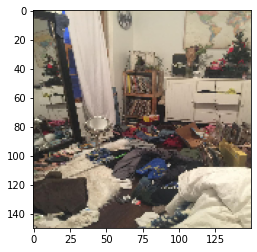

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')